In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from platform import python_version
print(python_version())

3.7.4


This exercise consists of 4 parts. Finish the first part to get the mark of 3.0. The first 3 parts to get 4.0. Finish all parts to get 5.0.

# Part 1: Linear layer

1.1) Let us start with a linear regression problem. Consider a linear function with a noise: $y = a*x+b + noise$.

We use this formula to generate $100$ random smaples.

In [8]:
### The number of samples
n = 100 
### parameters of the linear function
a = -2 
b = 3

1.2) Now, let us generate 100 samples and plot them. 

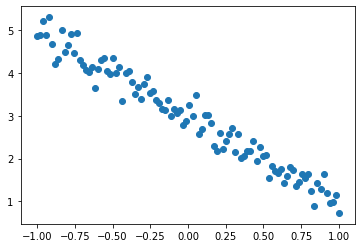

In [9]:
### generate equally spaced x-values
x = np.linspace(-1, 1, n) 
### generate y-values (we use a numpy library so we can generate a vector of numbers - y - inline)
y = a * x + b + np.random.normal(scale=0.25, size=n)

plt.scatter(x, y)

1.3) As you may see, the samples are placed - more or less - along a single line.
Now, our aim is to find the best parameters for a linear function 
so that such defined model describes the given data in the best possible way. For this reason, we will iteratively search the parameter space and update the model. Firstly, we need to define an error function. This function will inform how well (or bad) the instantiated model describes the data. For this reason, we use a mean square error function. <br>

We define a mean square error function as:<br>
$\dfrac{\sum\left(y_i - \widehat{y}_i \right)^2}{n} = MSE,$

where $y$ are the target (i.e., data values) and $\widehat{y}$ are the output (i.e., model's) values. <br>

See the MSE (mean square error) function given below.

In [10]:
def mse(y_target, y_calc):
    return ((y_target - y_calc) ** 2).mean()

1.4) Run the below code for different parameters of the model. Which paramter values give the best (i.e., minimal) MSE?

MSE  =  1.083245818868651


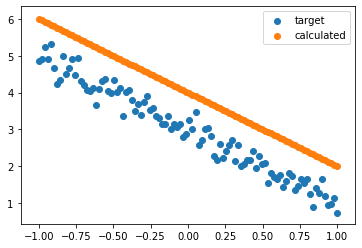

In [11]:
a_2 = -2
b_2 = 4

y_calc = a_2 * x + b_2
print("MSE  =  " + str(mse(y, y_calc)))

plt.scatter(x, y, label="target")
plt.scatter(x, y_calc, label="calculated")
plt.legend()

1.5) We want to find the best possible model parameters automatically. For this reason, we use a gradient of a loss function. The gradient informs what is the direction of the fastest increase/decrease of a given function. We use this information to update both model parameters. This procedure will be performed iterativelly. In each iteration, the parameters a and b will be slightly modififed such that MSE will be reduced (i.e., improved). <br>

Firstly, finish the below function. It should calculate a gradient of a loss function. Specifically, compute dE/dy (see the Exercies.pdf). (y_target, and y_calc are tensors,  not just scalars).

In [12]:
def mse_grad(y_target, y_calc):
    ### TODO
    return sum(y_calc-y_target)*2/len(y_calc)

### TEST
print(mse_grad(y, y_calc))

2.0272023590993182


1.4) Complete the below class representing a linear layer (or just a single linear neuron with one weight "a" for the input and one wieght "b" for the bias). The update function should alter the weights a and b using the gradient descent algorithm: x is an input vector, grad_y is a gradient of a loss function, i.e., dE/dE, computed using mse_grad method, and lr is the learning rate parameter.

In [13]:
class LinearLayer:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a * x + self.b

    def update(self, x, grad_y, lr):
        #print(x)
        self.a -= x*grad_y*lr
        self.b -= grad_y*lr

1.5) Complete the below "step" function. It shoul (1) compute the y_calc vector, i.e., the output vector, (2) loss, i.e., MSE, (3) gradient of the loss function, i.e., dE/dy, and (4) update the model parameters using the gradient descent algorithm.

In [14]:
def Step(x, y_target, model, lr):
    # TODO
    y_calc = model(x)
    loss = mse(y,y_calc)
    grad_y = mse_grad(y,y_calc)
    for ex in x:
      model.update(ex,grad_y,lr)
    return y_calc, loss

1.6) Instantiate the model. Run the step function for 100 epochs with lr = 0.05, a = 1.1, and b=2. Store the attained losses and plot them. 

In [15]:
model = LinearLayer(1.1, 2)

In [16]:
lr = 0.05

In [17]:
epoch = 100
losses = []
for i in range(epoch):
    y_calc, loss = Step(x, y, model, lr)
    losses.append(loss)

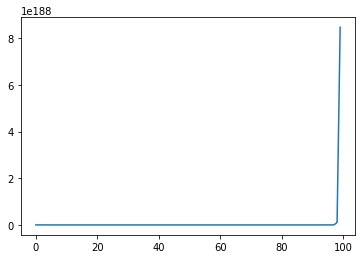

In [18]:
plt.plot(losses)

1.7) You may animate the learning process.

In [19]:
from matplotlib import animation, rc
from IPython.display import HTML
#from matplotlib.animation import FuncAnimation
rc('animation', html='jshtml')

In [20]:
model = LinearLayer(1.1, 2)

In [21]:
fig = plt.figure()
plt.scatter(x, y)
line, = plt.plot(x, y_calc, ".", c="orange")
plt.close()


def animate(i):
    y_calc, loss = Step(x, y, model, lr)
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, epoch), interval=20)

1.8) The above example can be implemented in pytorch. Read & analyze the code.

In [22]:
# Imports
import torch
import torch.nn as nn

In [23]:
# Convert numpy array to a torch tensor, [:,None] adds an additional dimension
xt = torch.FloatTensor(x[:, None])
yt = torch.FloatTensor(y[:, None])

In [24]:
def mse(y_target, y_calc):
    return ((y_target - y_calc) ** 2).mean()

In [25]:
class LinearLayer(nn.Module):
    def __init__(self, a, b):
        super(LinearLayer, self).__init__()  # initialize torch functionality
        # change a and b to float tensors, and next to parameters,
        # the main difference between tensor and parameter is that parameter keeps information about calculations,
        # which is used to calculate gradients
        self.a = nn.Parameter(torch.FloatTensor([a]).view(1, 1))
        self.b = nn.Parameter(torch.FloatTensor([b]))

    # forward function is similar to python __call__ but also contains torch functionality
    def forward(self, x):
        return  x @ self.a + self.b  # linear equation, @ means matrix multiplication for a tensor

    def update(self, lr):
        with torch.no_grad():  # when we update some parameter, we have to switch off gradient tracking
            self.a.sub_(lr * self.a.grad)  # inplace update of parameter a
            self.a.grad.zero_()  # clear gradient

            self.b.sub_(lr * self.b.grad)
            self.b.grad.zero_()

In [26]:
model =  LinearLayer(1.1, 0.2)

In [27]:
def torchStep(x, y, model, lr):
    y_calc = model(x)  # calculate the output of our model
    loss = mse(y, y_calc)  # calculate the loss
    loss.backward()  # calculate all gradients
    model.update(lr)  # update parameters
    return loss, y_calc

In [28]:
loss, y_calc = torchStep(xt, yt, model, lr)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep(xt, yt, model, lr)
    y_calc = y_calc.detach().cpu()  #
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [29]:
# we can use optymalizer to update parameters based on their gradients
# the most simple is stochastic gradient descent (SGD)
def torchStep2(x, y, model, optim):
    optim.zero_grad()  # clear gradients
    y_calc = model(x)  # calculate output of model
    loss = mse(y, y_calc)  # calculate loss
    loss.backward()  # calculate all gradients
    optim.step()  # make a optymalizer step which update parameters
    return loss, y_calc

In [30]:
model = LinearLayer(-1.1, 0.2)
optim = torch.optim.SGD(model.parameters(), lr)

In [31]:
loss, y_calc = torchStep2(xt, yt, model, optim)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep2(xt, yt, model, optim)
    y_calc = y_calc.detach().cpu()
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# Part 2: Convolution layer

In [32]:
# input image
image = np.array(
    [
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    ]
)

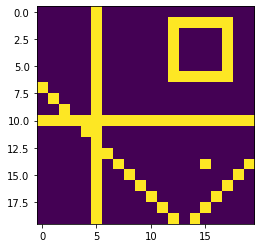

In [33]:
plt.imshow(image)

2.1) Complete the below function. It should convolve the input image with the kernel (mask). The kernel is of a 3x3 shape. Additionally, use the bias parameter (modify the result of the convolvution operation). Do not use padding, so the output image should be in size: (input_wight -2) x (input_height -2).

In [34]:
def Convolution(image, kernel, bias):
    img_out = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    for i in range(img_out.shape[0]):
        for j in range(img_out.shape[1]):
            img_out[i][j] = np.sum(image[i:i+3,j:j+3]*kernel+bias)
            
    return img_out

In [35]:
# kernel (mask) - this is just a simple mean filter
kernel = np.ones((3, 3)) / 9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [36]:
bias = -0.5

In [37]:
img_out = Convolution(image, kernel, bias)

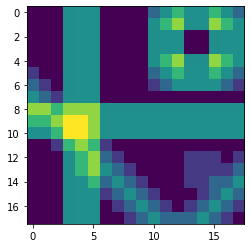

In [38]:
plt.imshow(img_out)

2.2) Find out kernels (masks) which can be used for horizontal and vertical edges detection.

In [39]:
kernel_horizontal = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])

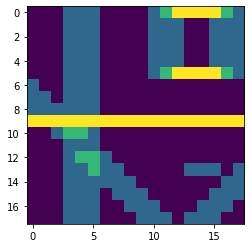

In [40]:
img_horizontal = Convolution(image, kernel_horizontal, -2)
plt.imshow(img_horizontal)

In [41]:
kernel_vertical = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])

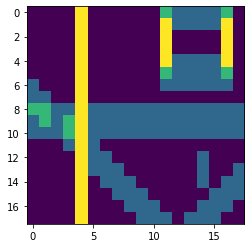

In [42]:
img_vertical = Convolution(image, kernel_vertical, -2)
plt.imshow(img_vertical)

2.3) Complete the below function for calculating ReLU.

In [43]:
def relu(x):
    return np.maximum(x, 0)

2.4) Find values for bias such that output pixels have a value above 0 only if original pixel is a part of the horizontal/vertical line.

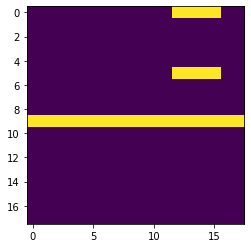

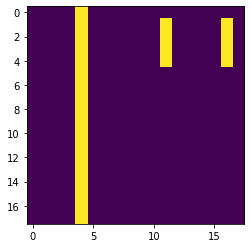

In [44]:
plt.imshow(relu(Convolution(image, kernel_horizontal, -0.3)))
plt.show()
plt.imshow(relu(Convolution(image, kernel_vertical, -0.3)))

# Part 3: Deep network

In [45]:
import pandas as pd

In [46]:
# load iris dataset
df = pd.read_csv('data/iris.csv')

In [47]:
# n - number of elements in dataset
n = len(df)
print(n)

150


In [48]:
# useful variables
feature_columns = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
target_column = "variety"
class_number = 3
feature_number = 4

In [49]:
# dictionaries use to map class name to number
name_to_class = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
class_to_name = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}

In [50]:
# conversion of class name
df[target_column] = df[target_column].apply(lambda x: class_to_name[x])

In [51]:
# take raw numpy data
x = df[feature_columns].values
y = df[target_column].values

In [52]:
# normalize data to make network input mean value equals 0 and standard deviation 1
x = (x - x.mean(0)) / x.std(0)
print(x.mean(0))
print(x.std(0))

[-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
[1. 1. 1. 1.]


In [53]:
# conversion numpy array to torch tensor
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [54]:
# Simple neural network with one hidden layer with hidden_nr neuron.
# Input_layer can detect some features which are then used by hidden_layer to make predictions.
# Between input_layer and hidden_layer: use relu as a nonlinear activation function.
# After hidden_layer, there is a sigmoid function because we want the network to return 
# probabilities for class assignments [0,1]
class Net(nn.Module):
    def __init__(self, input_nr, hidden_nr, output_nr):
        super(Net, self).__init__()
        self.input_layer = nn.Linear(input_nr, hidden_nr)
        self.hidden_layer = nn.Linear(hidden_nr, output_nr)

    def forward(self, x):
        x = self.input_layer(x)
        x = torch.relu(x)
        x = self.hidden_layer(x)
        return torch.sigmoid(x)

Cross entropy loss equals: $- (y=0) * log(p_0) - (y=1) * log(p_1)  - (y=2) * log(p_2)$ 
where $p_1, p_2,p_3$ are calculated probabilities for 1,2,3 class assignment; and y=0 means y is classified to class 0, and so on.

In [55]:
loss_func = nn.CrossEntropyLoss()

In [56]:
# accuracy means how many samples are classified correctly
def Accuracy(y_target, y_calc):
    prediction_class = y_calc.max(1)[1]
    number_of_correct = (prediction_class == y).float().sum()
    return number_of_correct / n

In [57]:
def Step(x, y, model, optim):
    optim.zero_grad()
    y_calc = model(x)
    loss = loss_func(y_calc, y)
    loss.backward()
    optim.step()
    acc = Accuracy(y, y_calc)
    return loss, y_calc, acc

In [58]:
# Train function trains model for epoch step and collects metrics (loss and accuracy)
def Train(x, y, model, optim, epoch):
    losses = []
    accuracies = []
    for i in range(epoch):
        loss, y_calc, acc = Step(x, y, model, optim)
        losses.append(loss)
        accuracies.append(acc)
    return losses, accuracies

In [59]:
lr = 0.1

In [60]:
# create a model and optimalizer
hidden_nr = 5
model = Net(feature_number, hidden_nr, class_number)
optim = torch.optim.SGD(model.parameters(), lr)

In [61]:
epoch = 200
losses, accuracies = Train(x, y, model, optim, epoch)

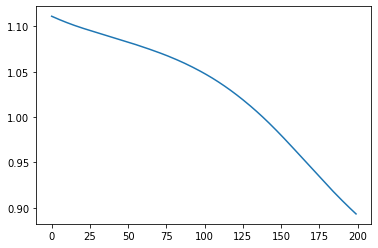

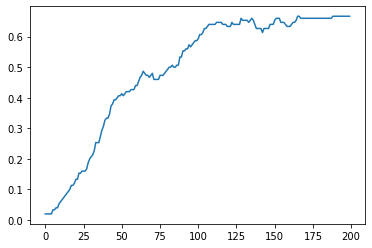

In [62]:
plt.plot(losses)
plt.show()
plt.plot(accuracies)

## Task for 5:
Choose one of the following:

3.1) Create a repor on testing the impact of different values for learning rate and number of neurons in hidden layer.

    test case 1: 
    learning rate:[ 1, 0.5, 0.1, 0.01, 0.001]
    number of neuron in hidden layer: 10
    
    test case 2: 
    number of neuron in hidden layer: [1, 2, 5, 10, 20, 100]
    learning rate: 0.1


Run every test 10 times with 200 epochs. Plot mean losses and accuracies for each test scenario. Make a table containing scores attained after 200 epochs. These scores should include the best, worst, mean, and standard deviation of lossess and accuracies (you can use pandas describe function). 


    
    

3.2) If you have a GPU, you can try to make an image classifier shown in https://course.fast.ai/videos/?lesson=2.
Watch the video. You can use the original "animals" dataset or prepare your own data set - but this should contain at least 4 different classes. 

Your task is to create a classifier and show working neural network at the laboratory. Furtermore, make a brief report where you:
- describe the dataset: number of samples, some examples, how it was prepared, number of samples in train and validation set, are there images which contains more than one class, batch size.
- describe the model: tested models
- describe the training process: how the verification process looked like, how many epoch it was run for, how long it took, data cleaning, learning rate finder and so on, plots of losses, and accuracy.
- describe the result: confusion matrix, examples of correctly/incorrectly classified images.

In [70]:
epoch=200
learning_rates = [ 1, 0.5, 0.1, 0.01, 0.001]
for learning_rate in learning_rates:
    hidden_nr = 10
    data=[]
    for i in range(10):
        model = Net(feature_number, hidden_nr, class_number)
        optim = torch.optim.SGD(model.parameters(), learning_rate)
        losses, accuracies = Train(x, y, model, optim, epoch)
        data.append([losses[-1].item(),accuracies[-1].item()])
    data = pd.DataFrame(data,columns=["Losses","Accuracies"])
    print(learning_rate)
    print(data.describe())

1
          Losses  Accuracies
count  10.000000   10.000000
mean    0.593024    0.973333
std     0.006209    0.000000
min     0.587967    0.973333
25%     0.589705    0.973333
50%     0.590316    0.973333
75%     0.593882    0.973333
max     0.608277    0.973333
0.5
          Losses  Accuracies
count  10.000000   10.000000
mean    0.653586    0.916667
std     0.034314    0.089787
min     0.623105    0.666667
25%     0.634750    0.923333
50%     0.644487    0.943333
75%     0.659518    0.958333
max     0.741264    0.973333
0.1
          Losses  Accuracies
count  10.000000   10.000000
mean    0.795862    0.786000
std     0.015393    0.054564
min     0.771277    0.686667
25%     0.786169    0.746667
50%     0.797951    0.796667
75%     0.808597    0.831667
max     0.814835    0.846667
0.01
          Losses  Accuracies
count  10.000000   10.000000
mean    1.060117    0.525333
std     0.022099    0.162353
min     1.022808    0.300000
25%     1.042767    0.373333
50%     1.067814    0.556667

In [71]:
hiddens = [1, 2, 5, 10, 20, 100]
learning_rate = 0.1
for hidden in hiddens:
    data=[]
    for i in range(10):
        model = Net(feature_number, hidden, class_number)
        optim = torch.optim.SGD(model.parameters(), learning_rate)
        losses, accuracies = Train(x, y, model, optim, epoch)
        data.append([losses[-1].item(),accuracies[-1].item()])
    data = pd.DataFrame(data,columns=["Losses","Accuracies"])
    print(hiddens)
    print(data.describe())

[1, 2, 5, 10, 20, 100]
          Losses  Accuracies
count  10.000000   10.000000
mean    1.023744    0.497333
std     0.064906    0.152743
min     0.935790    0.333333
25%     0.972912    0.348333
50%     1.020829    0.460000
75%     1.088383    0.665000
max     1.100332    0.666667
[1, 2, 5, 10, 20, 100]
          Losses  Accuracies
count  10.000000   10.000000
mean    0.902080    0.653333
std     0.052247    0.123048
min     0.821844    0.333333
25%     0.883600    0.646667
50%     0.898489    0.670000
75%     0.915000    0.690000
max     1.017440    0.800000
[1, 2, 5, 10, 20, 100]
          Losses  Accuracies
count  10.000000   10.000000
mean    0.846987    0.758667
std     0.080315    0.077606
min     0.770405    0.653333
25%     0.793030    0.683333
50%     0.831164    0.770000
75%     0.849218    0.815000
max     1.026626    0.860000
[1, 2, 5, 10, 20, 100]
          Losses  Accuracies
count  10.000000   10.000000
mean    0.798708    0.791333
std     0.033354    0.054619
min     0